In [21]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="white")

### 데이터 셋 생성

In [5]:
# Generate a large random dataset

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))     # axcii_letters[26:] : 알파벳

### 상관분석 시행

In [8]:
# Compute the correlation matrix
corr = d.corr()

### mask 생성

In [43]:
# corr 데이터를 np.zeros_like를 사용하여 0의 값으로 변환

mask_ex=np.zeros_like(corr)
mask_ex[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
# np.zeros_like의 옵션으로 dtype=bool을 줌으로써 불리언 값을 출력한다

mask=np.zeros_like(corr,dtype=bool)
mask[0:3]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]])

In [46]:
# 삼각형 마스크를 생성한다.(위쪽 삼각형 True, 아래쪽 삼각형 False)
# 이때 가릴 부분이 True로 온다.

mask[np.triu_indices_from(mask)]=True
mask[0:4]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True]])

### cmap 생성
    - 그래프에 사용될 색상 설정

In [49]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap

### heatmap 출력

<AxesSubplot:>

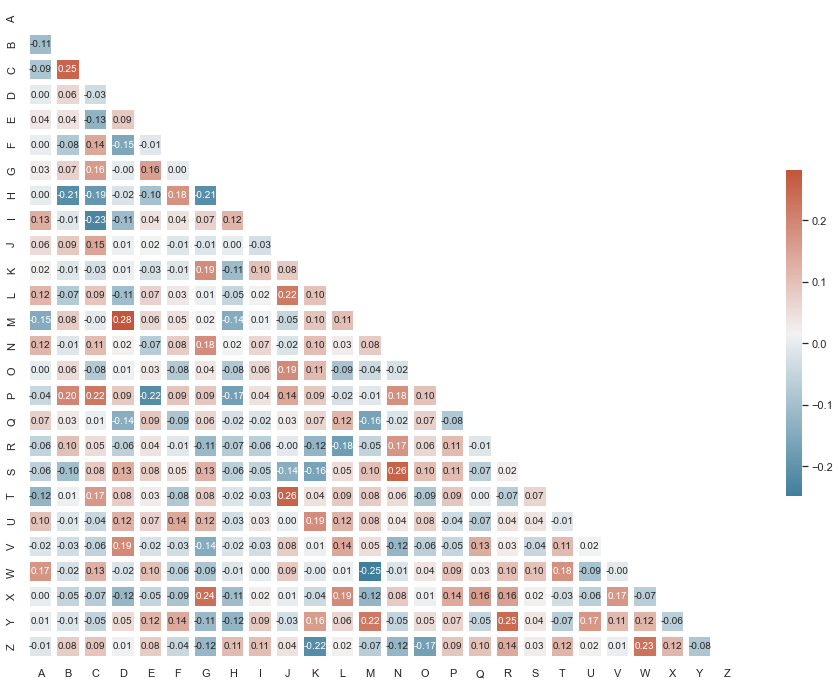

In [53]:
plt.figure(figsize=(16,12))

sns.heatmap(corr,                    # 사용할 데이터
           annot=True,              # annot=True : 상관계수 표시
           annot_kws={'size':10},    # annot_kws={'size': n} : 글자 크기 n 지정
           mask=mask,               # mask : 마스킹할, 즉 가릴 부분(아까 mask의 아래쪽이 False이므로 아래 삼각형 표시)
           cmap=cmap,               # cmap : 맵 색상
           linewidth=5,             # linewidth : 블록 사이의 경계선 표시
           fmt='.2f',               # fmt='.nf' : n자리까지 소수점 표시
           cbar_kws={"shrink": .5} # cbar_kws={'shrink': .n} : 우측 바 크기 조정
           )